##  <span style='color:green '>Evaluate Models</span>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')
import nfl_data_py as nfl

###  <span style='color:green '> Set up variables to be used in Fit Determination Function</span>

In [3]:
index = []
scores = {'Train Score': [], "Test Score": [], 'Test Train Difference': [], 'Scaler': []}
scalers = ["none", StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
models = [LinearRegression(),
          LogisticRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(),
          RandomForestClassifier(),
          ExtraTreesRegressor(),
          ExtraTreesClassifier(),
          AdaBoostRegressor(),
          AdaBoostClassifier()]

###  <span style='color:green '>Define Function to Test Models and Scalers</span>

In [4]:
def test_model(data):
    for scaler in scalers:
        global index
        global scores
        if scaler != "none":
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test
        data = X_train_scaled, X_test_scaled, y_train, y_test
        for model in models:
            reg = model.fit(X_train_scaled, y_train)
            y_pred = reg.predict(X_test_scaled)
            scores["Train Score"].append(reg.score(X_train_scaled, y_train))
            scores["Test Score"].append(reg.score(X_test_scaled, y_test))
            scores["Test Train Difference"].append((reg.score(X_train_scaled, y_train)-(reg.score(X_test_scaled, y_test))))
            scores["Scaler"].append(scaler)
            index += [type(reg).__name__]

###  <span style='color:green'>Get data and evaluate readiness for model</span>

<span style='color:green'>
    Find features and target,
    test for imbalance </span>

In [5]:
nfl.see_pbp_cols()
pbp2021 = nfl.import_pbp_data(years=[2021], downcast=True, cache=False, alt_path=None)
pbp2021


# load additional team data 
pbpclean = pbp2021
teams = nfl.import_team_desc()
players = nfl.import_rosters([2021])
player_seasons = nfl.import_seasonal_data([2021])
player_seasons.head(5)

apd = pd.read_csv('Resources/LynnesMegaFile.csv') 
apd_scope = apd[['Player', 'FantasyPoints', 'Production']].copy()

2021 done.
Downcasting floats.


In [6]:
apd

,Unnamed: 0,Player,Targets,RushingTDs,ReceivingTDs,Receptions,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,...,Usage,Touchdowns,TotYdsScrm,Production,PassingYds,PassingTD,PassingAtt,RushingTD,AVG,G
0,0,Cooper Kupp,191.0,0.0,16.0,145.0,4.0,18.0,1947.0,295.0,...,19.764706,16.0,1965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Deebo Samuel,121.0,8.0,6.0,77.0,59.0,365.0,1405.0,262.0,...,12.375000,14.0,1770.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Ja'Marr Chase,128.0,0.0,13.0,81.0,7.0,21.0,1455.0,224.0,...,12.294118,13.0,1476.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Justin Jefferson,167.0,0.0,10.0,108.0,6.0,14.0,1616.0,222.0,...,16.176471,10.0,1630.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Davante Adams,169.0,0.0,11.0,123.0,0.0,0.0,1553.0,221.0,...,18.250000,11.0,1553.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,661,Jacob Eason,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.000000,0.0,25.0,28.0,25.0,0.0,5.0,0.0,0.0,1.0
306,662,Feleipe Franks,0.0,0.0,0.0,0.0,0.0,6.0,0.0,-1.0,...,0.000000,0.0,6.0,42.0,0.0,0.0,1.0,0.0,0.0,9.0
307,665,Logan Woodside,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,-1.0,...,0.000000,0.0,-6.0,42.0,0.0,0.0,0.0,0.0,0.0,5.0
308,668,John Wolford,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0,...,0.000000,0.0,4.0,37.0,5.0,0.0,4.0,0.0,0.0,3.0


In [7]:
apd["Production"].value_counts()

1.0      139
42.0      10
2.0        5
28.0       2
35.0       2
        ... 
59.0       1
60.0       1
50.0       1
53.0       1
123.0      1
Name: Production, Length: 118, dtype: int64

In [8]:
count_nan = apd.isna().sum().sum()
count_nan
col = [0,1]
apd.drop(apd.columns[col],axis=1,inplace=True)
apd

,Targets,RushingTDs,ReceivingTDs,Receptions,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production,PassingYds,PassingTD,PassingAtt,RushingTD,AVG,G
0,191.0,0.0,16.0,145.0,4.0,18.0,1947.0,295.0,3.5,17.0,19.764706,16.0,1965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121.0,8.0,6.0,77.0,59.0,365.0,1405.0,262.0,19.0,16.0,12.375000,14.0,1770.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128.0,0.0,13.0,81.0,7.0,21.0,1455.0,224.0,9.3,17.0,12.294118,13.0,1476.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,167.0,0.0,10.0,108.0,6.0,14.0,1616.0,222.0,6.3,17.0,16.176471,10.0,1630.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,169.0,0.0,11.0,123.0,0.0,0.0,1553.0,221.0,11.5,16.0,18.250000,11.0,1553.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.000000,0.0,25.0,28.0,25.0,0.0,5.0,0.0,0.0,1.0
306,0.0,0.0,0.0,0.0,0.0,6.0,0.0,-1.0,0.0,0.0,0.000000,0.0,6.0,42.0,0.0,0.0,1.0,0.0,0.0,9.0
307,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,-1.0,0.0,0.0,0.000000,0.0,-6.0,42.0,0.0,0.0,0.0,0.0,0.0,5.0
308,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,0.0,0.000000,0.0,4.0,37.0,5.0,0.0,4.0,0.0,0.0,3.0


In [9]:
# Standarize data with StandarScaler
apds = StandardScaler().fit_transform(apd)
print(apd[0:1])

   Targets  RushingTDs  ReceivingTDs  Receptions  RushingAtt  RushingYds  \
0    191.0         0.0          16.0       145.0         4.0        18.0   

   ReceivingYds  FantasyPoints  ADP  Games      Usage  Touchdowns  TotYdsScrm  \
0        1947.0          295.0  3.5   17.0  19.764706        16.0      1965.0   

   Production  PassingYds  PassingTD  PassingAtt  RushingTD  AVG    G  
0         1.0         0.0        0.0         0.0        0.0  0.0  0.0  


###  <span style='color:green '> PCA</span>
<span style='color:green '> Applying PCA to reduce dimensions while preserving 99% of the explained variance </span>

In [10]:
# Applying PCA to reduce dimensions while preserving 90% of the explained variance 
# Initialize PCA model by setting n-components to desired level
pca = PCA(n_components= .99)

# Fit our new Principal Component Analysis reduced Features to our Model
pfa = pca.fit_transform(apds)

# Transform PCA data to a DataFrame
pf = pd.DataFrame(data=pfa)
pf.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.046194,8.972155,-1.485290,-3.032604,0.892380,-0.512034,0.589209,-0.589623,1.26887,0.516494,-0.202652,0.352935
1,-2.061648,9.679825,19.167311,1.398401,-1.713364,-1.388263,0.595834,-0.130856,1.10453,-0.691385,0.222460,0.286274


###  <span style='color:green '>Create X and Y | Reshape the data</span>

In [11]:
# Create X (features) and y (target) sets
X = pf
y = apd["Production"].values

print("Shape: ", X.shape, y.shape)

Shape:  (310, 12) (310,)


###  <span style='color:green '>Split data into Training and Testing sets</span>

In [12]:
# Split the data into training and testing sets
data = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

###  <span style='color:green '>Get to know our data</span>

Training Data Score: 1.0
Testing Data Score: 0.9820838466240333
[0.07139836 0.29081525 0.0390805  0.33219968 0.01932029 0.04101411
 0.04636444 0.13565753 0.00598319 0.00442876 0.00507344 0.00866446]


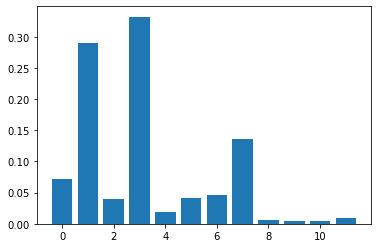

Wall time: 283 ms


In [13]:
%%time
# setting Random forest as sample to view data 
classifier = ExtraTreesRegressor()
clf = classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

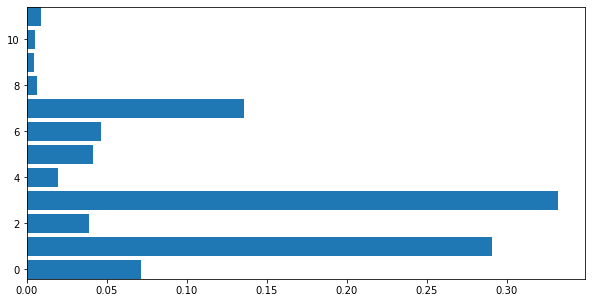

Wall time: 126 ms


In [14]:
%%time
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

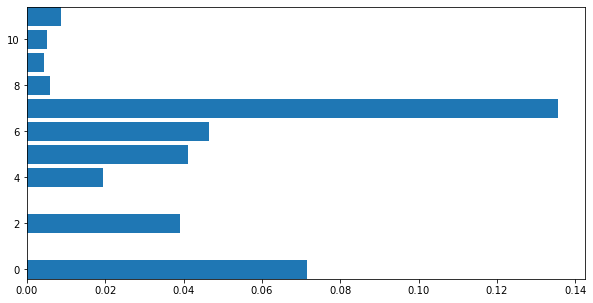

Wall time: 141 ms


In [15]:
%%time
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
features = features[:10]
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [16]:
y_predicted = clf.predict(X_test)
scores = clf.score(X_test, y_test)

print(y_predicted)
print(scores)

[  9.64    2.45    2.07   16.21    1.46    1.2     2.     94.3     3.86
  10.55    1.     76.     42.85   41.205  26.34   32.42    1.63   61.56
  68.26   83.91    1.56    4.79   22.12  109.075   1.05   75.885  35.29
   7.32   18.91    1.     11.54    1.     12.63    5.01   48.44    1.79
   4.12   17.5    76.7     1.67   14.48    1.      3.98    6.52   32.54
 110.315  96.85    1.79   12.59    1.05   49.185   3.09   67.26    6.01
 118.405   3.62   42.08    3.75   83.63   90.98   97.775  69.365  14.53
  37.145   7.57    2.06  110.97    1.47  102.175   1.34    1.3     5.38
  67.69    2.71    1.6     2.32    8.9   104.115]
0.9820838466240333


In [17]:
y_predicted = clf.predict(X)
print(y_predicted)

[  1.      1.      1.      1.      1.      1.63    5.38    1.79    1.
   2.45    1.      1.      1.      1.      1.      1.      1.     17.5
   1.      1.      1.      1.      1.6     1.      1.      1.46    1.
   1.      1.      1.      2.71    1.      1.      7.32    1.      1.
  30.      1.      1.      1.      1.      1.     14.48    1.      1.
   4.12   10.55    1.      1.      1.     42.      1.      2.      1.
   1.      1.      8.9     2.07   18.      1.34   16.21    1.      1.
   1.2     1.      1.      1.      1.      1.      1.      8.      7.
  44.      1.56   27.      1.      1.05    1.05    1.47    1.      1.
   1.     12.63    1.      6.01   47.      1.      1.     17.      1.
   1.      1.      2.     48.44   39.      1.     10.     80.     37.
   1.     12.      1.79    1.      1.      4.79    1.    101.     13.
  11.54   37.145  36.      1.     21.     35.29   49.185  35.     33.
  91.      1.3     1.67    1.     25.     26.     24.     11.     31.
  14.53   55.     9

In [18]:
apd_scope['Prediction'] = y_predicted

In [19]:
apd_scope.sort_values('Prediction', ascending=True).head(50)

,Player,FantasyPoints,Production,Prediction
0,Cooper Kupp,295.0,1.0,1.0
144,N'Keal Harry,16.0,1.0,1.0
143,Dyami Brown,16.0,1.0,1.0
278,Jordan Love,21.0,1.0,1.0
281,Marcus Mariota,15.0,1.0,1.0
138,JuJu Smith-Schuster,20.0,1.0,1.0
136,Breshad Perriman,22.0,1.0,1.0
135,Parris Campbell,22.0,1.0,1.0
120,Isaiah McKenzie,33.0,1.0,1.0
111,Marquise Goodwin,37.0,1.0,1.0


In [21]:
# save
joblib.dump(classifier, "Resources/draft_position.joblib")

['Resources/draft_position.joblib']

### <span style='color:green '>The section below is to evaluate new potential Models </span>

In [ ]:
# # Create X (features) and y (target) sets
# X = pf

# #convert y values to categorical values(for model selection matrix)
# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y)
# y = y_transformed

# # Split the data into training and testing sets
# data = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [ ]:
# %%time
# # call function test_model to test all models being considered
# test_model(data)

In [ ]:
# # Print by Training Score
# df_scores = pd.DataFrame(scores, index=index)
# df_scores.sort_values('Train Score', ascending=False).head(10)
# # Print by Testing Score
# df_scores.sort_values('Test Score', ascending=False).head(10)
# # Print by Testing Score
# df_scores['Test Train Magnitude'] = abs(df_scores['Test Train Difference'])
# df_scores.sort_values('Test Train Magnitude').head(10)